# DCT and IDCT

Date: 2023/10/14

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
import glob

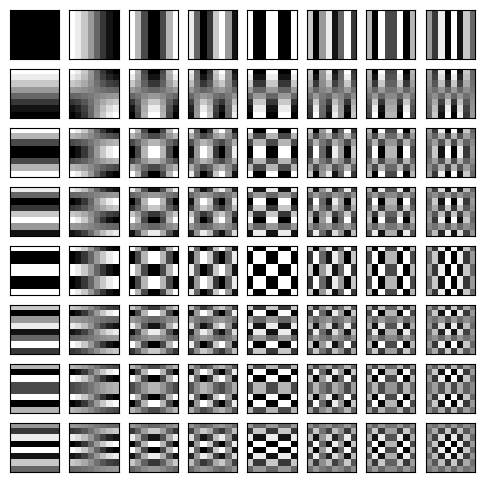

In [3]:
fig, axes = plt.subplots(8,8, figsize=(6,6))
patterns = np.zeros([8,8,8,8])
for x in range(8):
    for y in range(8):
        dcted = np.zeros([8,8])
        dcted[x,y] = 1
        img = idct(idct(dcted, norm='ortho').T, norm='ortho').T
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        axes[x,y].imshow(img, cmap='gray')
        patterns[x,y,:,:] = img

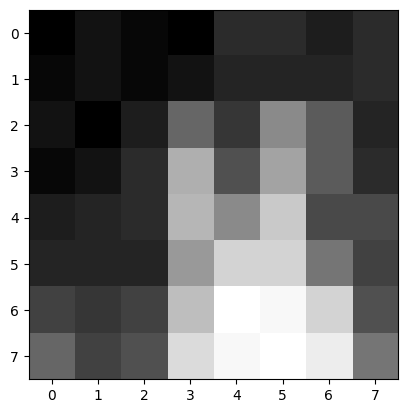

In [4]:
data = np.array([[26.8, 25.8, 26.2, 30., 30.8, 31., 30.5, 27.2],
 [25.8, 25.5, 25.8, 29.2, 31.,  30.8, 29.8, 26.2],
 [25.,  25.,  25.,  28.2, 29.8, 29.8, 27.2, 25.8],
 [24.8, 25.,  25.2, 29.,  27.8, 29.5, 26.,  26.],
 [24.2, 24.5, 25.2, 28.8, 26.2, 28.5, 26.5, 25.2],
 [24.5, 24.,  24.8, 26.8, 25.5, 27.8, 26.5, 25. ],
 [24.2, 24.5, 24.2, 24.5, 25.,  25.,  25.,  25.2],
 [24.,  24.5, 24.2, 24.,  25.2, 25.2, 24.8, 25.2]])
data = data[::-1]
plt.imshow(data, cmap='gray')

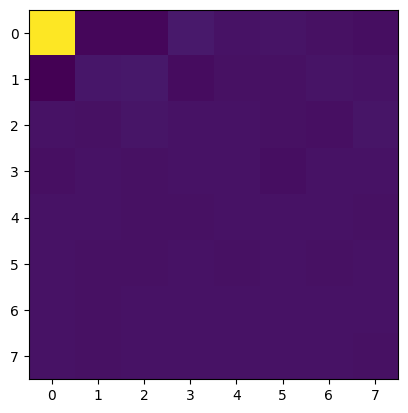

In [5]:
dcted_data = dct(dct(data, norm='ortho').T, norm='ortho').T
plt.imshow(dcted_data, cmap='viridis')

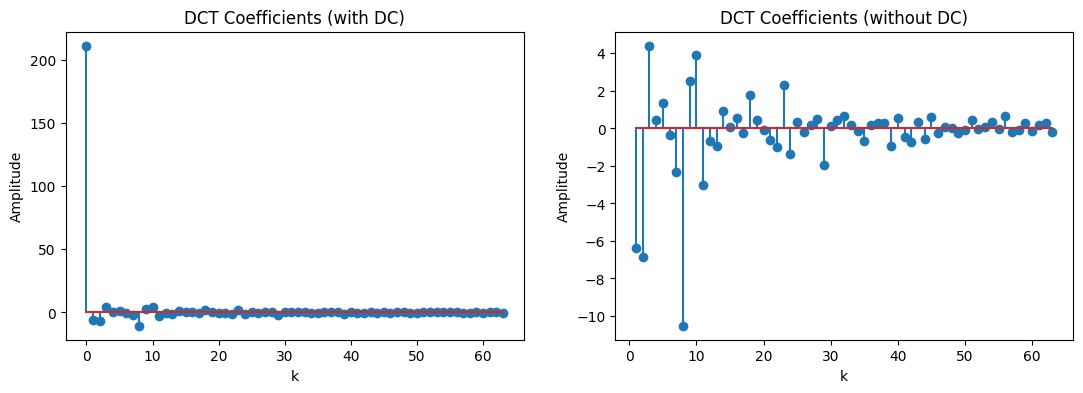

In [6]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].stem(dcted_data.flatten())
ax[0].set_title('DCT Coefficients (with DC)')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Amplitude')
ax[1].stem(np.arange(1,64), dcted_data.flatten()[1:])
ax[1].set_title('DCT Coefficients (without DC)')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Amplitude')
plt.show()

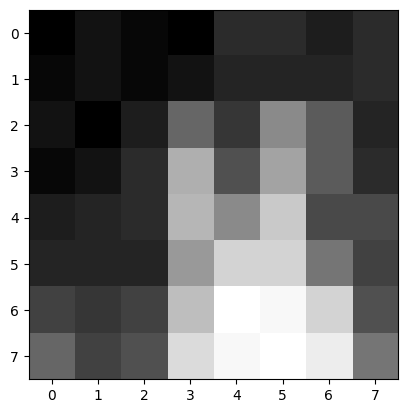

In [7]:
idcted_data = np.zeros([8,8])
for x in range(8):
    for y in range(8):
        idcted_data += dcted_data[x,y] * patterns[x,y]
plt.imshow(idcted_data, cmap='gray')

In [8]:
ZIGZAG = [[0,0],\
          [1,0],\
          [0,1], [0,2],\
          [1,1], [2,0], [3,0],\
          [2,1], [1,2], [0,3], [0,4],\
          [1,3], [2,2], [3,1], [4,0], [5,0],\
          [4,1], [3,2], [2,3], [1,4], [0,5],\
          [0,6], [1,5], [2,4], [3,3], [4,2], [5,1], [6,0],\
          [7,0], [6,1], [5,2], [4,3], [3,4], [2,5], [1,6], [0,7],
          [1,7], [2,6], [3,5], [4,4], [5,3], [6,2], [7,1],\
          [7,2], [6,3], [5,4], [4,5], [3,6], [2,7],\
          [3,7], [4,6], [5,5], [6,4], [7,3],\
          [7,4], [6,5], [5,5], [4,6], [3,7],\
          [4,7], [5,6], [6,5], [7,4],\
          [7,5], [6,6], [5,7],\
          [6,7], [7,6],\
          [7,7]]

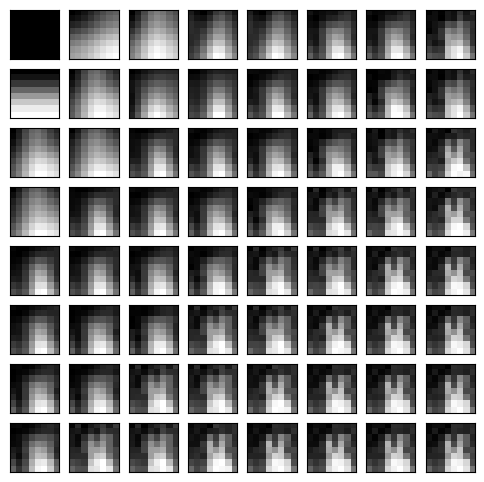

In [9]:
idcted_data = np.zeros([8,8])

fig, axes = plt.subplots(8,8, figsize=(6,6))
for x, y in ZIGZAG:
    idcted_data += dcted_data[x, y] * patterns[x, y]
    axes[x, y].imshow(idcted_data, cmap='gray')
for x in range(8):
    for y in range(8):
        axes[x, y].set_xticks([])
        axes[x, y].set_yticks([])